### Import Dialogue Data Set for Booking Travel

In [1]:
from pandas.io.json import json_normalize
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
with open('frames.json') as datafile:
    data = json.load(datafile)
    
df = pd.DataFrame(json_normalize(data))

### Top level columns are id, labels (userSurveyRating & wizardSurveyTaskSuccessful), turns, user_id, and wizard_id 

In [3]:
df.head(n=10)

,id,labels.userSurveyRating,labels.wizardSurveyTaskSuccessful,turns,user_id,wizard_id
0,e2c0fc6c-2134-4891-8353-ef16d8412c9a,4.0,True,[{'text': 'I'd like to book a trip to Atlantis...,U22HTHYNP,U21DKG18C
1,4a3bfa39-2c22-42c8-8694-32b4e34415e9,3.0,True,"[{'text': 'Hello, I am looking to book a vacat...",U21E41CQP,U21DMV0KA
2,6e67ed28-e94c-4fab-96b6-68569a92682f,2.0,False,[{'text': 'Hello there i am looking to go on a...,U21RP4FCY,U21E0179B
3,5ae76e50-5b48-4166-9f6d-67aaabd7bcaa,5.0,True,[{'text': 'Hi I'd like to go to Caprica from B...,U22HTHYNP,U21DKG18C
4,24603086-bb53-431e-a0d8-1dcc63518ba9,5.0,True,"[{'text': 'Hello, I am looking to book a trip ...",U21E41CQP,U21DMV0KA
5,bbd17a54-bc6c-4237-8f72-4778081fab0c,3.0,True,"[{'text': 'Hey, i Want to go to St. Louis on t...",U21RP4FCY,U21E0179B
6,660f2f7a-b660-4f2c-aae9-e5cdb28d818c,4.0,False,[{'text': 'I'm looking for a trip to Gotham Ci...,U22HTHYNP,U21DKG18C
7,84823cb8-4e01-4dc1-8d10-1f2a5ef40b80,4.0,False,"[{'text': 'Hello, I would like to book a 2-wee...",U21E41CQP,U21DMV0KA
8,3f238ba1-c385-415a-a511-998330c03750,4.0,False,"[{'text': 'Hello, I am planning to book a trip...",U21RP4FCY,U21E0179B
9,45f2dfa5-d8ad-4f33-8994-68bc040e6901,5.0,False,"[{'text': 'Hi, I need to go to Mos Eisley for ...",U22HTHYNP,U21DKG18C


array([<matplotlib.axes._subplots.AxesSubplot object at 0x152913748>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x152af6be0>], dtype=object)

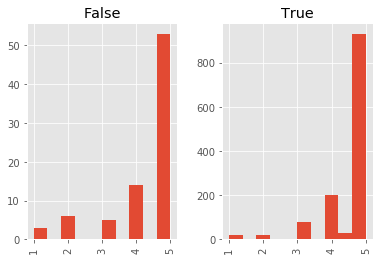

In [34]:
# Data Exploration: userSurveyRatings & wizardSurveyTaskSuccessful
# If userSurvey is > 4 and wizard rated itself True, then good.
# If userSurvey is < 4 and wizard rated itself True, then not good.
# If wizard rated itself False and userSurvey is > 4, then treat with care but may discard it.
# If wizard rated itself False and userSurvey is < 4, then not good but may discard it.

df.hist(column="labels.userSurveyRating",by="labels.wizardSurveyTaskSuccessful")
#plt.yscale("log")

In [30]:
# Looking at the turns column, which is still nested.
# Each row contains one entire conversation.
# Each portion of the conversation can be called within this row.
# From each conversation, the keys can be accessed to return some meaningful information.

df['turns'][0][3]

{'author': 'wizard',
 'db': {'result': [[], [], [], [], [], []],
  'search': [{'ARE_DATES_FLEXIBLE': 'true',
    'DESTINATION_CITY': 'Atlantis',
    'END_TIME': '1472011200000',
    'NUM_ADULTS': '8',
    'NUM_CHILDREN': '',
    'ORIGIN_CITY': 'Caprica',
    'PRICE_MIN': '1700',
    'RESULT_LIMIT': '10',
    'START_TIME': '1471060800000',
    'timestamp': 1471272454.542},
   {'ARE_DATES_FLEXIBLE': 'true',
    'DESTINATION_CITY': 'Atlantis',
    'END_TIME': '1472011200000',
    'NUM_ADULTS': '8',
    'NUM_CHILDREN': '',
    'ORIGIN_CITY': 'Caprica',
    'PRICE_MIN': '1700',
    'RESULT_LIMIT': '10',
    'START_TIME': '1471060800000',
    'timestamp': 1471272466.008},
   {'ARE_DATES_FLEXIBLE': 'true',
    'DESTINATION_CITY': 'Neverland',
    'END_TIME': '1472011200000',
    'NUM_ADULTS': '5',
    'NUM_CHILDREN': '',
    'ORIGIN_CITY': 'Caprica',
    'PRICE_MAX': '1900',
    'RESULT_LIMIT': '10',
    'START_TIME': '1471060800000',
    'timestamp': 1471272562.484},
   {'ARE_DATES_FLEXIBLE'